In [1]:
import cv2 #import OpenCV
from matplotlib import pyplot as plt #import python plot graph
import matplotlib as mpl #import math library from python

In [2]:
bg = cv2.imread('bg.jpg')
bg = cv2.cvtColor(bg,cv2.COLOR_BGR2RGB)
fg = cv2.imread('fg.jpg')
fg = cv2.cvtColor(fg,cv2.COLOR_BGR2RGB)

In [3]:
def get_figsize(im):
    # What size does the figure need to be in inches to fit the image?
    dpi = plt.rcParams['figure.dpi']
    dim = im.shape
    figuresize = dim[1]/float(dpi), dim[0]/float(dpi)
    return(figuresize)

In [4]:
def display_image_actual_size_single(im_data):
    figuresize = get_figsize(im_data)
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figuresize)
    # Add the single axis to fit the image to the screen boundary
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(im_data, cmap='gray')
    ax.axis('off')
    plt.show()
    return(fig)

In [5]:
def display_image_actual_size_double(im_data1,im_data2):
    # assuming that the two input images have the same dimension and shape
    # then, we calculate figsize from one of the two images
    figuresize = get_figsize(im_data1)
    # Create a figure of the right size that can accommodate two images side-by-side
    fig = plt.figure(figsize=(figuresize[0],figuresize[1]*2+.1))
    ax1 = fig.add_axes([0,0,1,1])
    ax1.imshow(im_data1, cmap='gray')
    ax1.axis('off')
    ax2 = fig.add_axes([1.1,0,1,1])
    ax2.imshow(im_data2, cmap='gray')
    ax2.axis('off')
    return(fig)

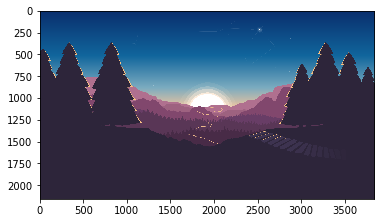

In [6]:
plt.imshow(bg)

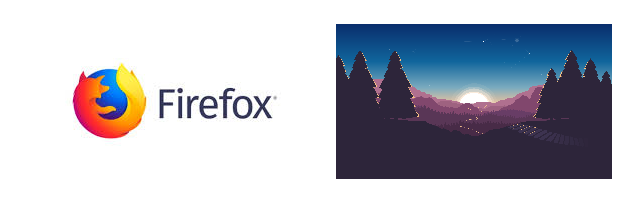

In [7]:
fig = display_image_actual_size_double(fg, bg)

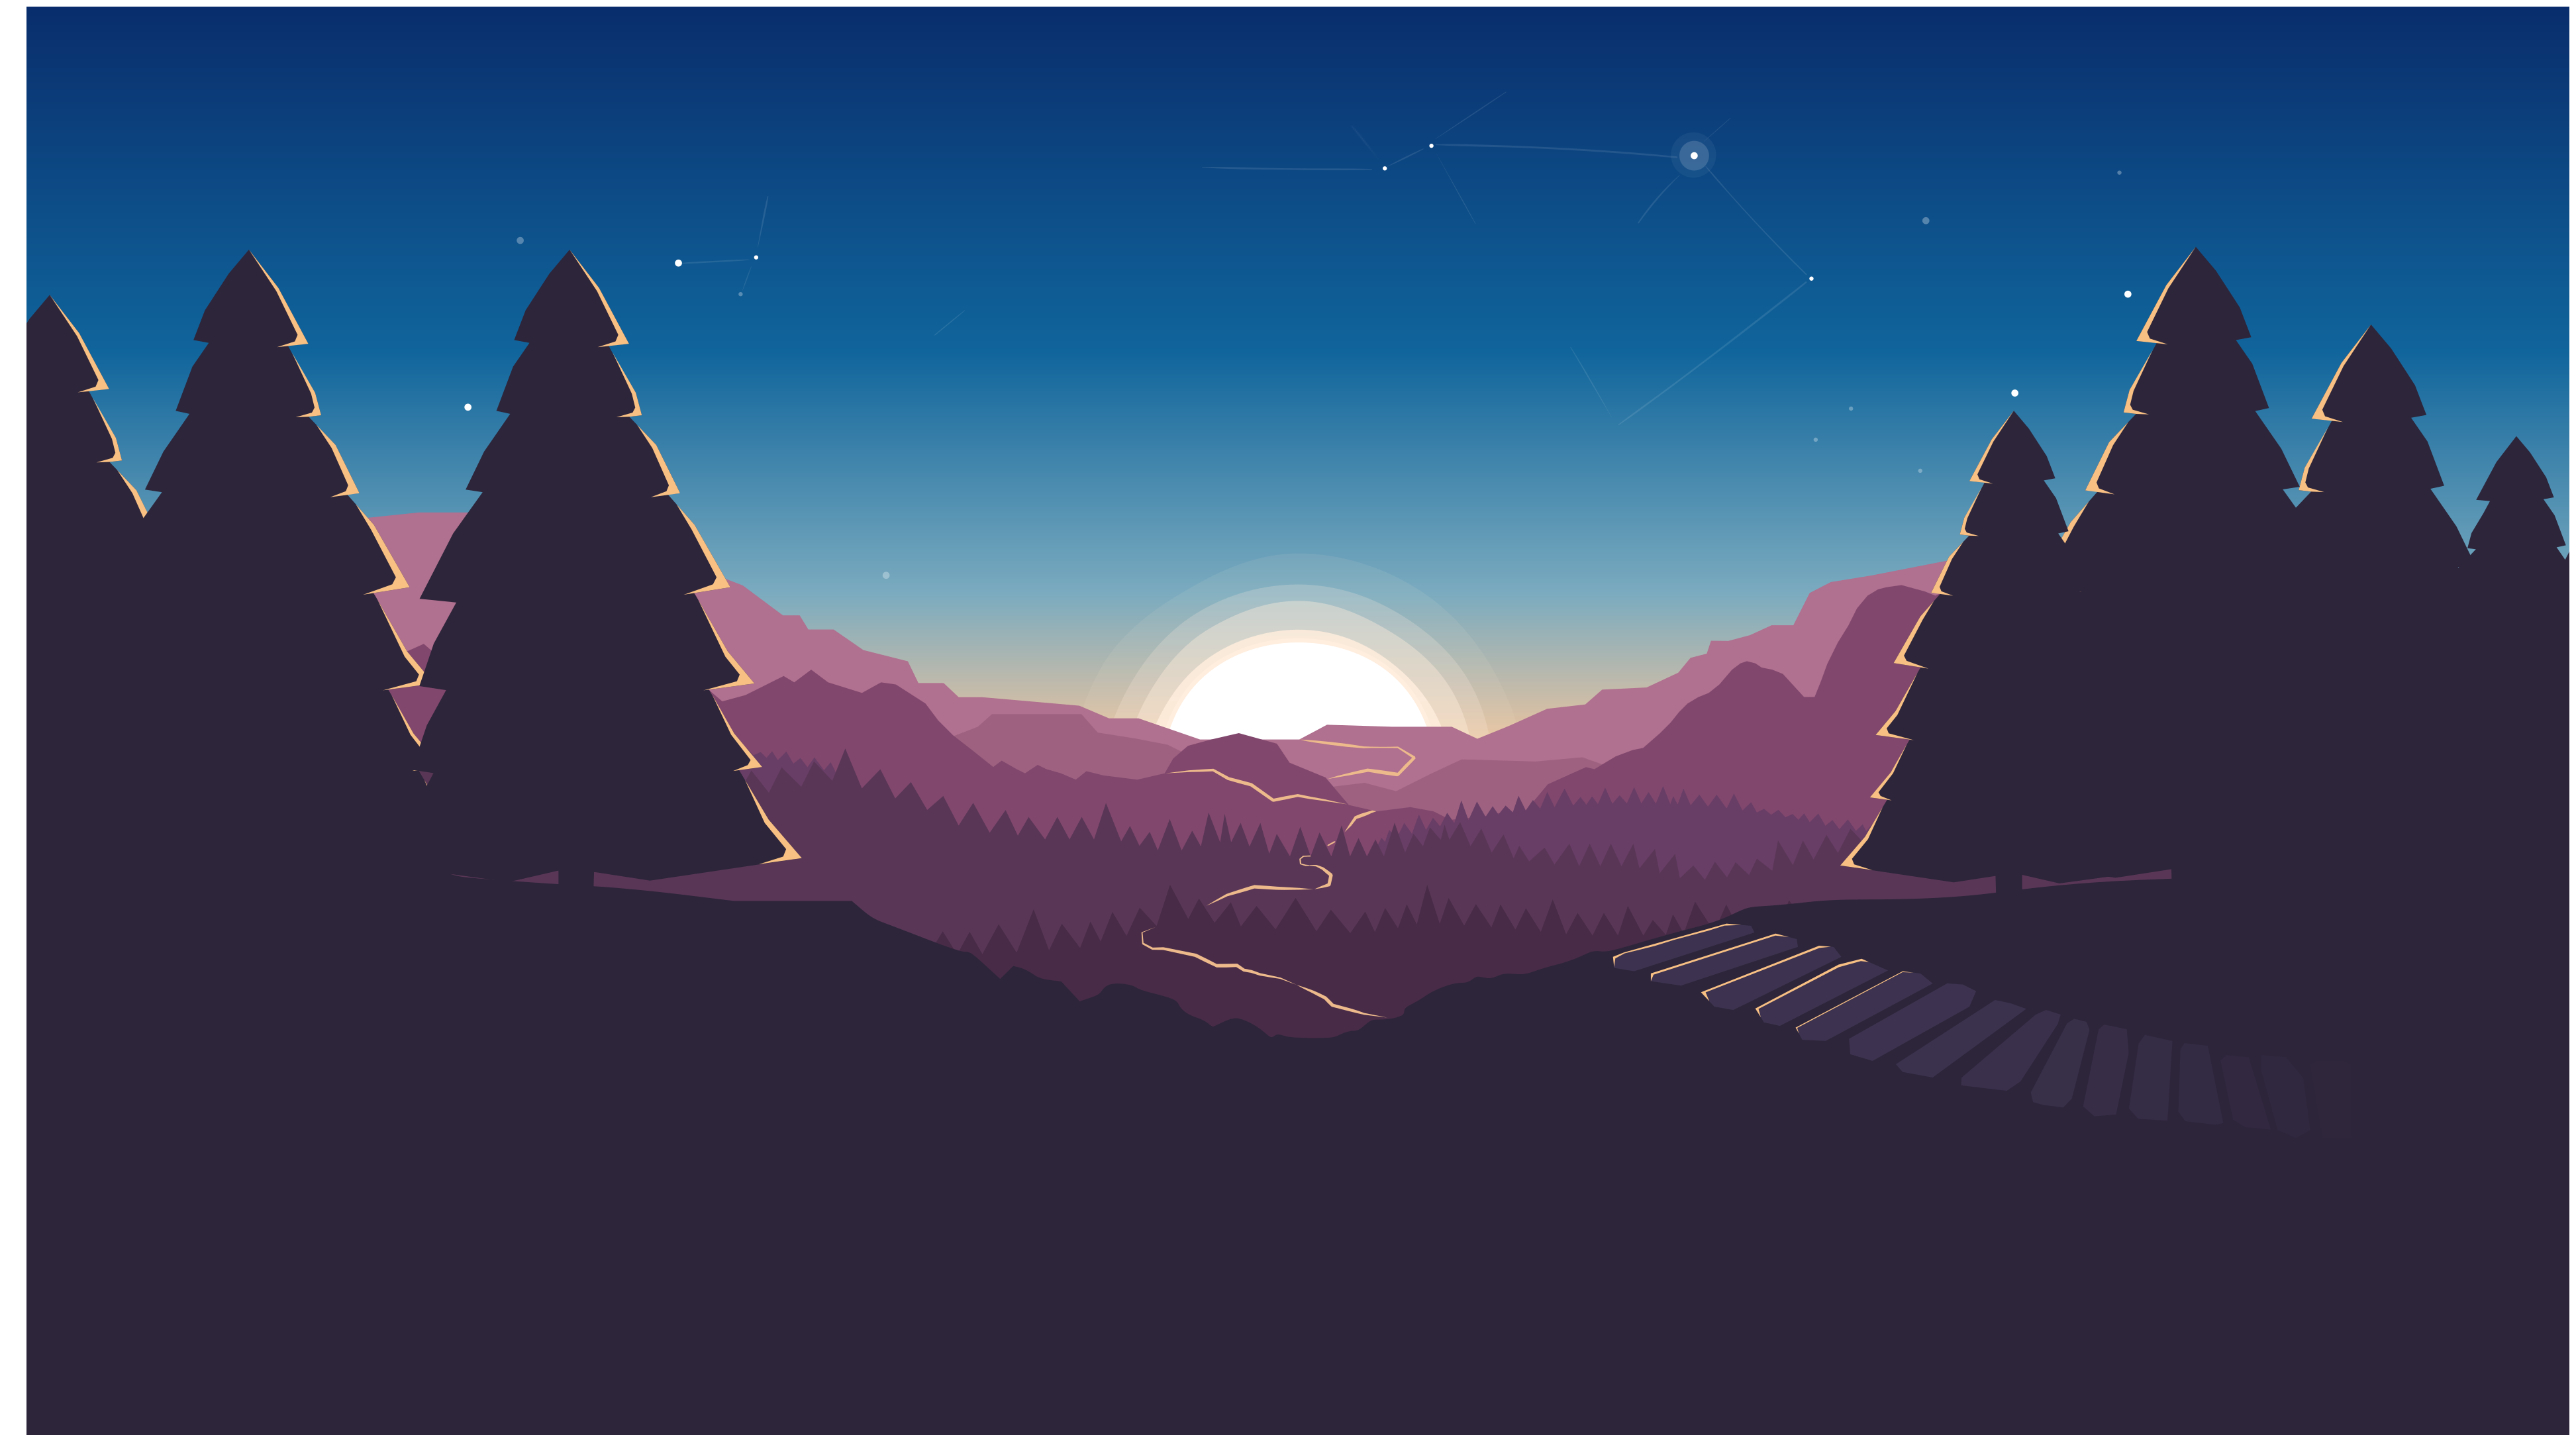

In [8]:
fig = display_image_actual_size_single(bg)
plt.show()

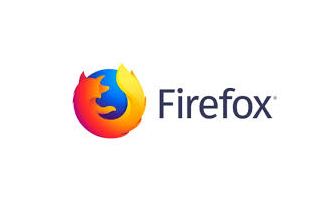

In [9]:
fig = display_image_actual_size_single(fg)
plt.show()

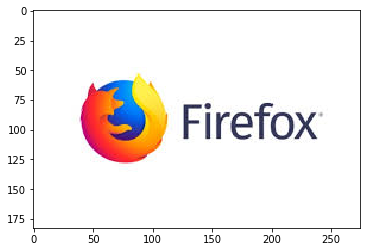

In [10]:
plt.imshow(fg)

(183, 275, 3)
(183, 275, 3)


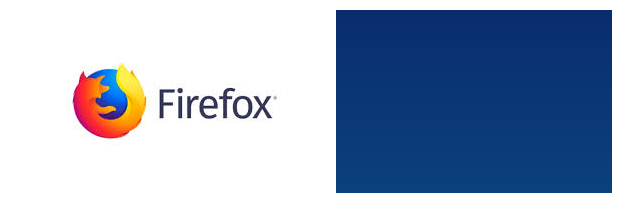

In [11]:
rows, cols, channels = fg.shape       #get the width, the height, and the channels of fg
roi = bg[0:0+rows, 0:0+cols]  #cut from bg the roi of the same dimesions as fg
print(fg.shape)
print(roi.shape)
fig = display_image_actual_size_double(fg,roi)
fig.savefig("Lab3Ex1.jpg",bbox_inches='tight')

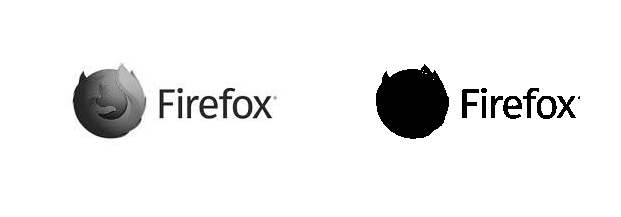

In [12]:
fgGrayscale = cv2.cvtColor(fg,cv2.COLOR_BGR2GRAY)
retval, mask = cv2.threshold(fgGrayscale, 200, 255, cv2.THRESH_BINARY)
fig = display_image_actual_size_double(fgGrayscale, mask)
fig.savefig("Lab3Ex2.jpg",bbox_inches='tight')

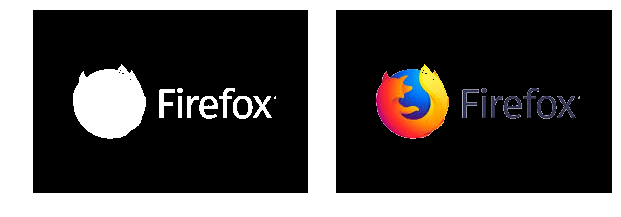

In [13]:
mask_inv = cv2.bitwise_not(mask)
result = cv2.bitwise_and(fg, fg, mask = mask_inv)
fig = display_image_actual_size_double(mask_inv,result)
fig.savefig("Lab3Ex3.jpg",bbox_inches='tight')

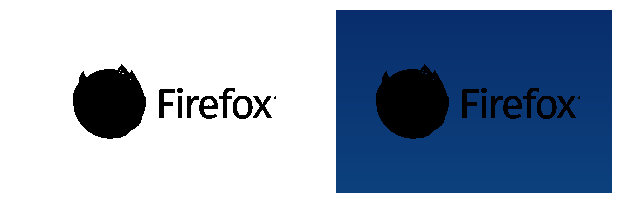

In [14]:
result2 = cv2.bitwise_and(roi,roi,mask=mask)
fig = display_image_actual_size_double(mask,result2)
fig.savefig("Lab3Ex4.jpg", bbox_inches='tight')

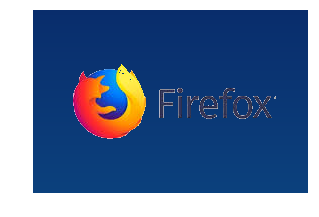

In [25]:
result3 = cv2.add(result,result2)
fig = display_image_actual_size_single(result3)
fig.savefig("Lab3Ex5.jpg", bbox_inches='tight')

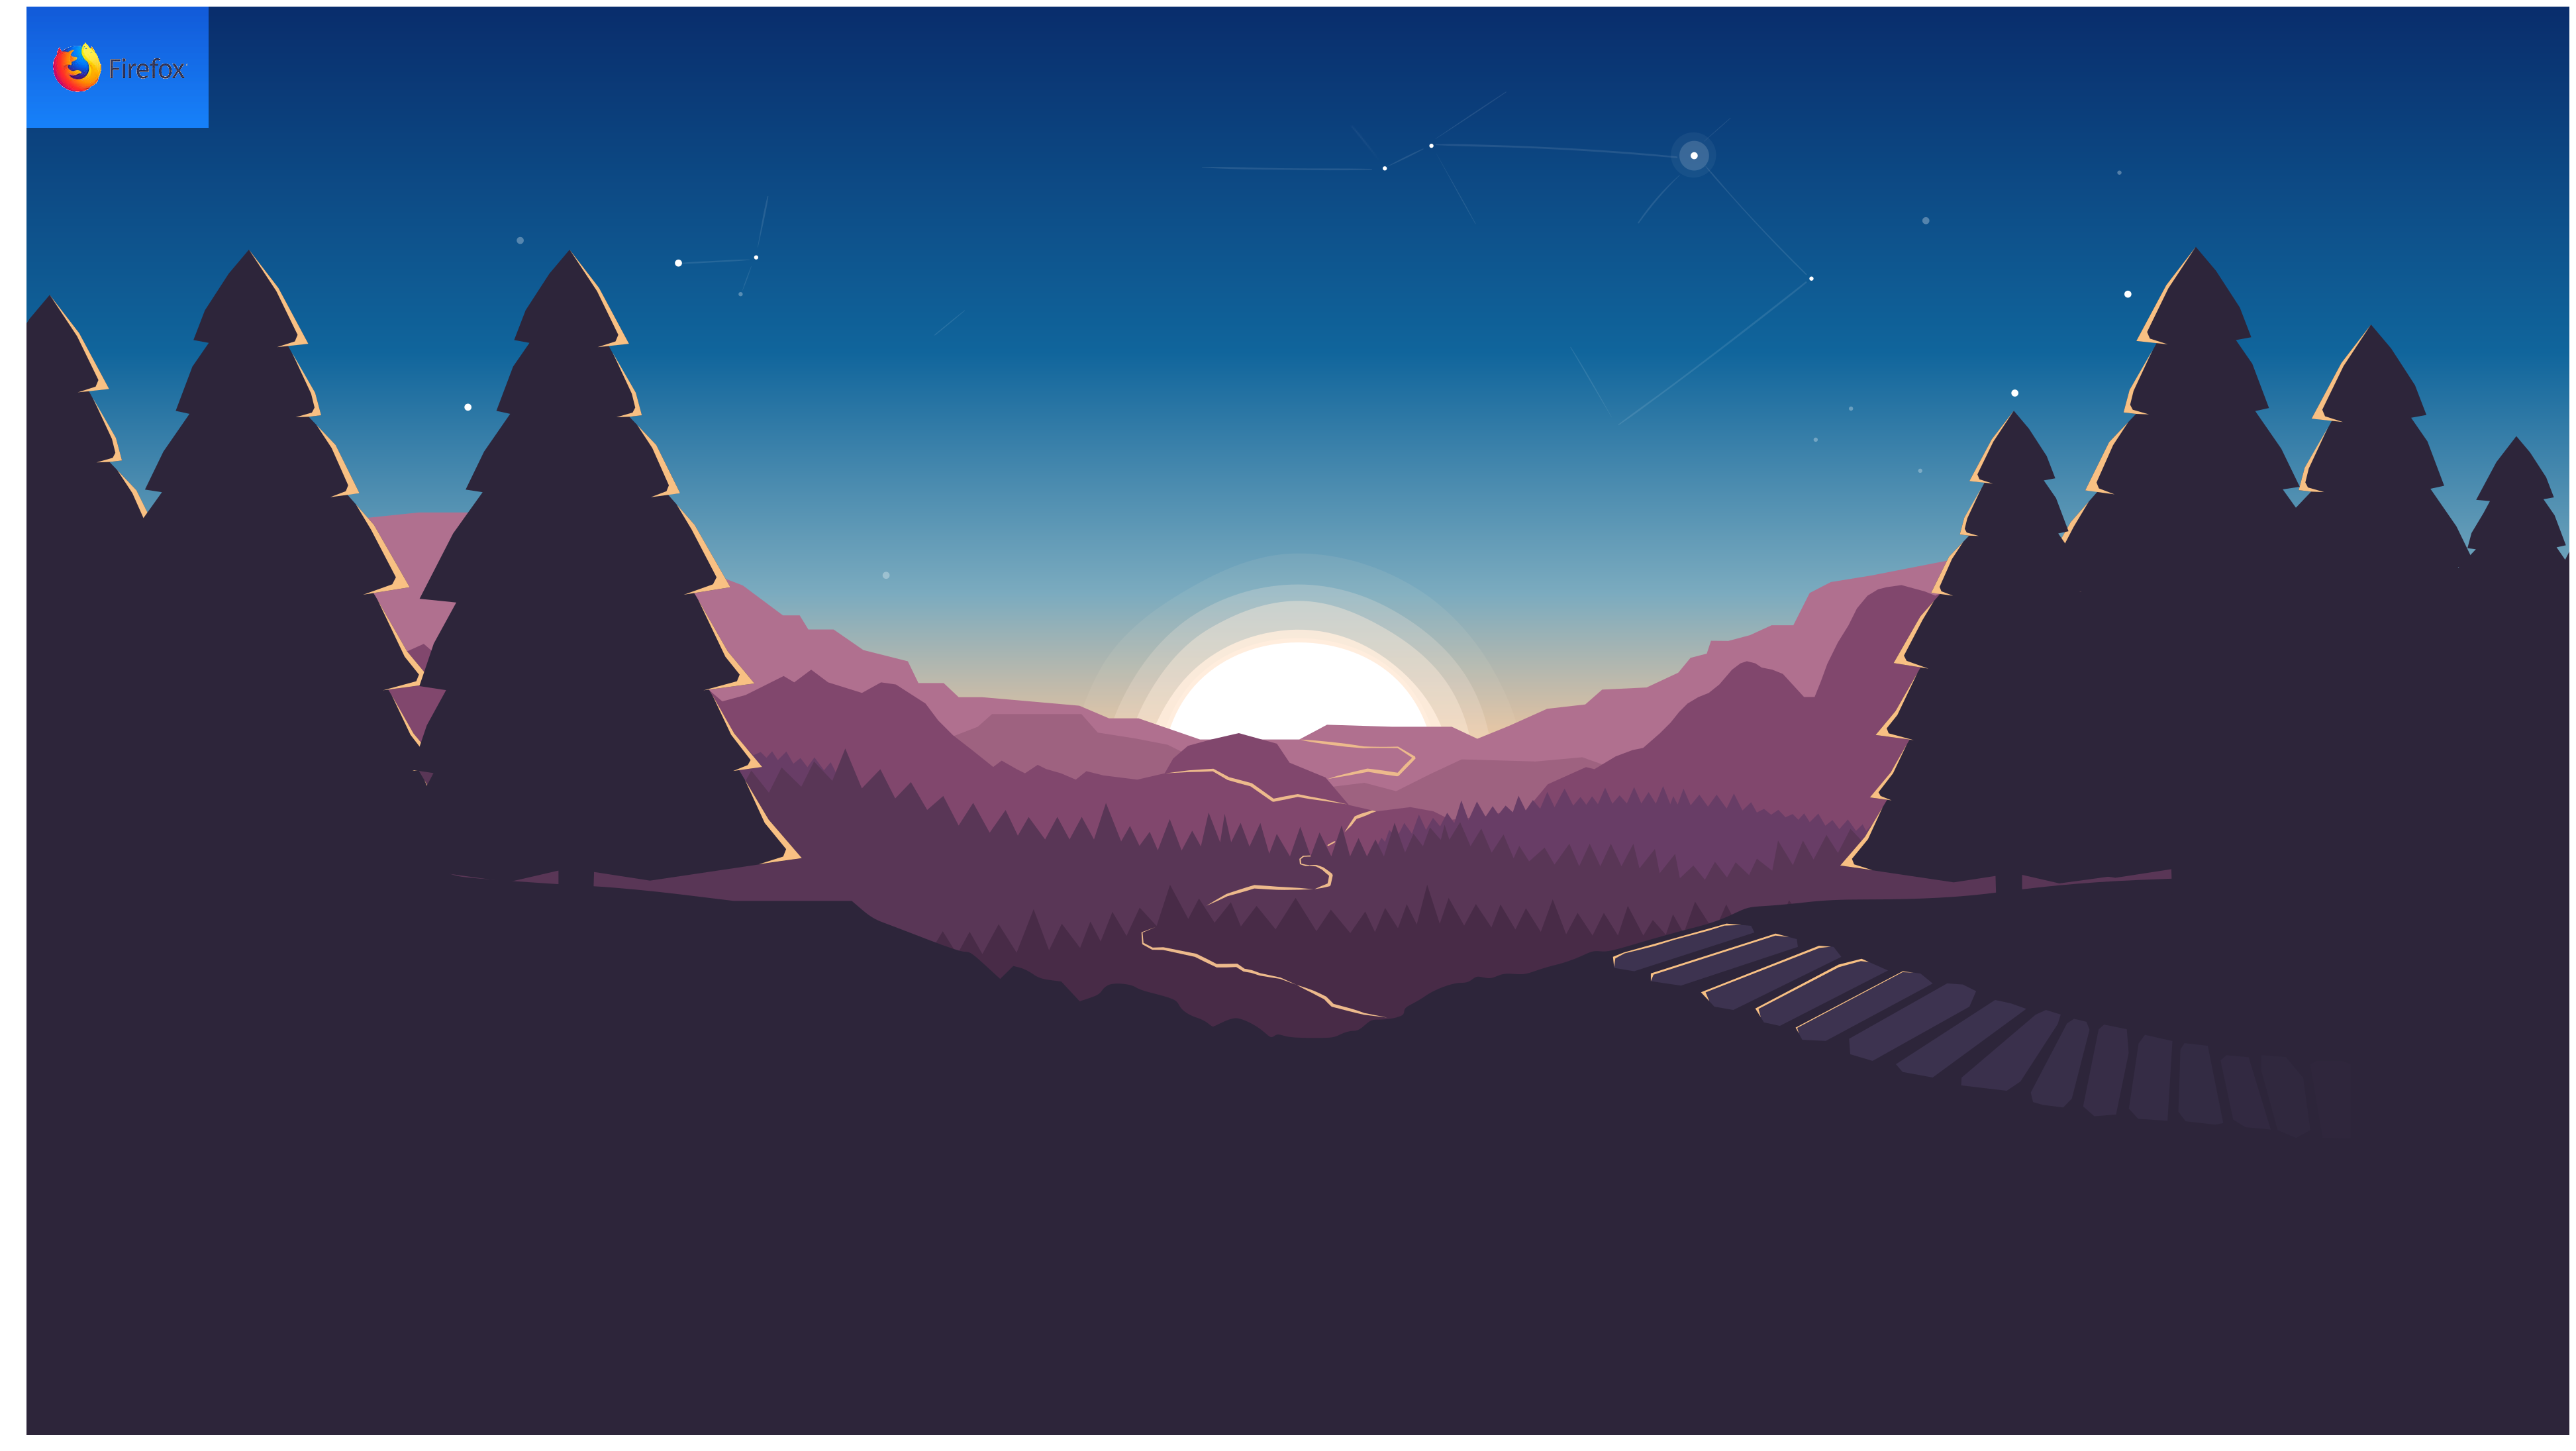

In [26]:
dst = cv2.add(result2,result3)
bg[0:rows, 0:cols ] = dst
fig = display_image_actual_size_single(bg)
fig.savefig("Lab3Ex6.jpg", bbox_inches='tight')